In [7]:
from qiskit import QuantumCircuit, IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qoca import GGate, ZYGate, ZXGate
from numpy import pi

provider = IBMQ.load_account()
backend = Aer.get_backend("statevector_simulator")

ibmqfactory.load_account:WARNING:2021-02-08 18:09:49,541: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
qc = QuantumCircuit(2)
qc.append(GGate(),[0],[])
qc.append(ZYGate(theta = pi),[0,1],[])
qc.append(ZXGate(theta = pi),[0,1],[])
qc.measure_all()
qc.draw()

┌───┐┌────────┐┌────────┐ ░ ┌─┐   
   q_0: ┤ G ├┤0       ├┤0       ├─░─┤M├───
        └───┘│  ZY(π) ││  ZX(π) │ ░ └╥┘┌─┐
   q_1: ─────┤1       ├┤1       ├─░──╫─┤M├
             └────────┘└────────┘ ░  ║ └╥┘
meas: 2/═════════════════════════════╩══╩═
                                     0  1

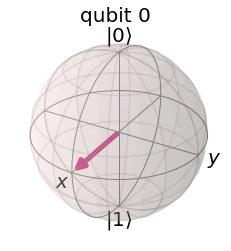

In [4]:
qc = QuantumCircuit(1)
qc.h(0)

job = execute(qc, backend, shots=20, memory = True).result()
memory = job.get_statevector(qc)
plot_bloch_multivector(memory)

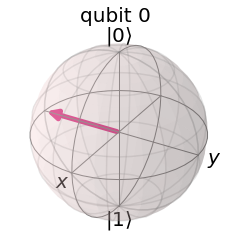

In [3]:
qc = QuantumCircuit(1)
qc.append(GGate(),[0],[])

job = execute(qc, backend, shots=20, memory = True).result()
memory = job.get_statevector(qc)
plot_bloch_multivector(memory)

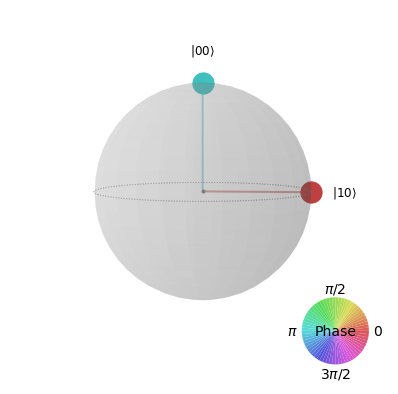

In [13]:
qc = QuantumCircuit(2)
qc.append(ZYGate(theta = pi/2),[0,1],[])

job = execute(qc, backend, shots=20, memory = True).result()
memory = job.get_statevector(qc)
plot_state_qsphere(memory)

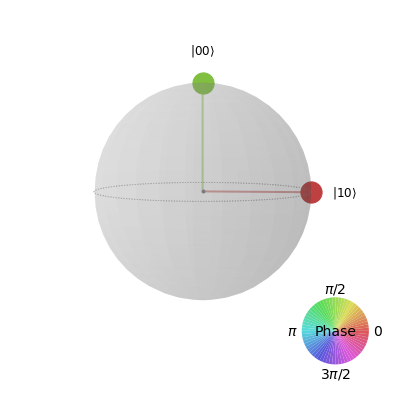

In [12]:
qc = QuantumCircuit(2)
qc.append(ZXGate(theta = pi/2),[0,1],[])

job = execute(qc, backend, shots=20, memory = True).result()
memory = job.get_statevector(qc)
plot_state_qsphere(memory)